What still needs to be done

Choose the best model (may not be the last one)

Initialize the DATA

In [2]:


from sklearn.model_selection import train_test_split
from sociophysicsDataHandler import SociophysicsDataHandler
import pandas as pd
import matplotlib.pyplot as pl

student_config = True

file_target = 'asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet' 

if student_config:
    dh = SociophysicsDataHandler()
    dh.fetch_prorail_data_from_path(file_target)
else:
    webdav_basepath='/Crowdflow (Projectfolder)/ProRail_USE_LL_data'
    dh = SociophysicsDataHandler(basepath=webdav_basepath)
    
    dh.fetch_prorail_data_from_path(file_target)
                           # ,basepath=webdav_basepath)

print('The available files are the following:')
dh.list_files("econophysics/reddit/")
for path in dh.filelist['path']:
    print(path)

targetPosts = True
stock = 'GME'

if targetPosts:
    filename = 'submissions_wallstreetbets_' + stock + '_start20200901_end20210706.json'
    if stock == 'GME':
        filename = 'submissions_wallstreetbets_GME_start20200901_end20210624.json'
else:
    filename = 'comments_' + stock + '.tar.gz'
    
dh.fetch_econophysics_data_from_path("econophysics/reddit/" + filename)
df = dh.df
# print one of the entries (in this case, the fifth):
df

for col in df.columns:
    print(col)

pd.set_option('display.max_columns', None)
df





trying to fetch: /storage/surfsara/ProRail_USE_LL_data/asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet
data fetched. Accessible as <this-object>.df
The available files are the following:
targeting path /storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/
Files listed. Accessible as <this-object>.filelist
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AAPL.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AMC.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_BBBY.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_FIZZ.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_GME.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_LGND.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_NOKIA.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_VIAC.tar.gz
/storage/surfsara/ProRail_USE_LL_

,id,all_awardings,author,author_fullname,created_utc,full_link,gildings,id.1,link_flair_css_class,link_flair_text,num_comments,num_crossposts,over_18,permalink,pinned,retrieved_on,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,total_awards_received,upvote_ratio,url,created,removed_by_category
0,o72ekv,[],Siphen_,t2_a0s1xfzf,1624546147,https://www.reddit.com/r/wallstreetbets/commen...,{},o72ekv,dd,DD,0,0,False,/r/wallstreetbets/comments/o72ekv/citadel_capi...,False,1624546158,1,If you find where they are hiding taking profi...,wallstreetbets,t5_2th52,10584237,Citadel Capital Replenishment,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624538947,None
1,o72axq,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545829,https://www.reddit.com/r/wallstreetbets/commen...,{},o72axq,meme,Meme,1,0,False,/r/wallstreetbets/comments/o72axq/a_bird_took_...,False,1624545840,1,None,wallstreetbets,t5_2th52,10584217,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/kz3w2tqa78771.jpg,1624538629,moderator
2,o728za,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545659,https://www.reddit.com/r/wallstreetbets/commen...,{},o728za,news,News,1,0,False,/r/wallstreetbets/comments/o728za/a_bird_took_...,False,1624545671,1,None,wallstreetbets,t5_2th52,10584198,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/8mfoeejs68771.jpg,1624538459,moderator
3,o7284r,[],QuantitativEasing,t2_51vqmztv,1624545587,https://www.reddit.com/r/wallstreetbets/commen...,{},o7284r,yolo,YOLO,0,0,False,/r/wallstreetbets/comments/o7284r/been_with_gm...,False,1624545598,1,None,wallstreetbets,t5_2th52,10584191,Been with GME since $6,0,1.0,https://www.reddit.com/gallery/o7284r,1624538387,None
4,o723cs,[],Shlome_Mendlovits,t2_auf64xr4,1624545165,https://www.reddit.com/r/wallstreetbets/commen...,{},o723cs,dd,DD,0,0,False,/r/wallstreetbets/comments/o723cs/pubm_stock_i...,False,1624545177,1,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",wallstreetbets,t5_2th52,10584165,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624537965,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175412,ikrq8w,[],DeepFuckingValue,t2_49l8qytq,1598990735,https://www.reddit.com/r/wallstreetbets/commen...,{},ikrq8w,yolo,YOLO,93,0,False,/r/wallstreetbets/comments/ikrq8w/gme_yolo_mon...,False,1598990746,1,None,wallstreetbets,t5_2th52,1452992,GME YOLO month-start update — Sep 1 2020,0,1.0,https://i.redd.it/r47cc12lelk51.png,1598983535,None
175413,ikpgw9,[],airdoon,t2_10emmm,1598983707,https://www.reddit.com/r/wallstreetbets/commen...,{},ikpgw9,question,Discussion,41,0,False,/r/wallstreetbets/comments/ikpgw9/gme_short_sq...,False,1598983717,1,This is for all of you who think GME is the ne...,wallstreetbets,t5_2th52,1452670,GME short squeeze,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598976507,None
175414,ikp9ie,[],cyanlce,t2_zaweod7,1598983100,https://www.reddit.com/r/wallstreetbets/commen...,{},ikp9ie,question,Discussion,0,0,False,/r/wallstreetbets/comments/ikp9ie/gme_short_sq...,False,1598983111,1,[removed],wallstreetbets,t5_2th52,1452638,$GME short squeeze to the moon,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598975900,moderator
175415,ikeagj,[],King_Tendie_69,t2_5wcvwhh8,1598936908,https://www.reddit.com/r/wallstreetbets/commen...,{},ikeagj,question,Discussion,1,0,False,/r/wallstreetbets/comments/ikeagj/gme_who_is_w...,False,1598936918,1,[https://www.marketwatch.com/investing/stock/g...,wallstreetbets,t5_2th52,1451373,GME: Who is wielding adamantium gauntlets?,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598929708,None


In [3]:
stockname = ['AAPL', 'AMC', 'BBBY', 'FIZZ', 'GME', 'LGND', 'NOKIA', 'VIAC']
stock_post = {}
for stock in stockname:
    if stock == 'GME':
        filename = 'submissions_wallstreetbets_GME_start20200901_end20210624.json'
        dh.fetch_econophysics_data_from_path(f'econophysics/reddit/submissions_wallstreetbets_{stock}_start20200901_end20210624.json')
        stock_post[f'{stock}_post'] = dh.df
    else:
        dh.fetch_econophysics_data_from_path(f'econophysics/reddit/submissions_wallstreetbets_{stock}_start20200901_end20210706.json')
        stock_post[f'{stock}_post'] = dh.df

stock_post['AMC_post']

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_AAPL_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_AMC_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_BBBY_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_FIZZ_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_GME_start20200901_end20210624.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_

,all_awardings,author,author_fullname,created_utc,full_link,gildings,id,link_flair_css_class,link_flair_text,num_comments,num_crossposts,over_18,permalink,pinned,removed_by_category,retrieved_on,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,total_awards_received,upvote_ratio,url,created
oevdl8,[],CommunicationIll570,t2_8vxmkab5,1625579605,https://www.reddit.com/r/wallstreetbets/commen...,{},oevdl8,meme,Meme,1,0,False,/r/wallstreetbets/comments/oevdl8/hold_gme_and...,False,moderator,1625579616,1,,wallstreetbets,t5_2th52,10638036,Hold GME and Load AMC ……..,0,1.0,https://i.redd.it/lgcv9lo8ll971.jpg,1625572405
oev564,[],treasurebones,t2_4m3r39a5,1625578817,https://www.reddit.com/r/wallstreetbets/commen...,{},oev564,news,News,2,0,False,/r/wallstreetbets/comments/oev564/amc/,False,reddit,1625578828,1,,wallstreetbets,t5_2th52,10637994,AMC 🚀🚀🚀🚀🚀🌚,0,1.0,https://www.google.com/amp/s/www.cnbc.com/amp/...,1625571617
oev55r,[],Comfortable_Ad_2346,t2_7lmxbwft,1625578816,https://www.reddit.com/r/wallstreetbets/commen...,{},oev55r,question,Discussion,0,0,False,/r/wallstreetbets/comments/oev55r/goldman_upda...,False,None,1625578827,1,"The topp ten ranked by exposure:\n\n1: SRNE, 2...",wallstreetbets,t5_2th52,10637994,"Goldman updates its ""50 most shorted basket"" o...",0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1625571616
oeufu0,[],phadam120,t2_11oudagj,1625576412,https://www.reddit.com/r/wallstreetbets/commen...,{},oeufu0,question,Discussion,0,0,False,/r/wallstreetbets/comments/oeufu0/which_is_eas...,False,None,1625576423,1,Hi all\n\nI primarily use Robinhood and i know...,wallstreetbets,t5_2th52,10637844,Which is easier?,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1625569212
oeuax0,[],realplayer16,t2_y4w5p,1625575924,https://www.reddit.com/r/wallstreetbets/commen...,{},oeuax0,news,News,1,0,False,/r/wallstreetbets/comments/oeuax0/amc_withdraw...,False,reddit,1625575934,1,,wallstreetbets,t5_2th52,10637820,AMC Withdraws 25M Share Increase Proposal From...,0,1.0,https://www.hollywoodreporter.com/business/bus...,1625568724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ili63n,[],Wiletj1,t2_16vcujch,1599089415,https://www.reddit.com/r/wallstreetbets/commen...,{},ili63n,shitpost,Shitpost,2,0,False,/r/wallstreetbets/comments/ili63n/when_are_you...,False,moderator,1599089426,1,[removed],wallstreetbets,t5_2th52,1456999,When Are Your AMC Puts Expiring,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1599082215
ilhn1t,[],Wiletj1,t2_16vcujch,1599087565,https://www.reddit.com/r/wallstreetbets/commen...,{},ilhn1t,question,Discussion,2,0,False,/r/wallstreetbets/comments/ilhn1t/good_expirat...,False,moderator,1599087576,1,[removed],wallstreetbets,t5_2th52,1456923,Good Expiration Date for Shorting AMC,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1599080365
il848o,[],JackMaverick7,t2_cf7s4,1599057930,https://www.reddit.com/r/wallstreetbets/commen...,{},il848o,question,Discussion,2,0,False,/r/wallstreetbets/comments/il848o/amc_up_15_to...,False,moderator,1599057941,1,,wallstreetbets,t5_2th52,1455463,$AMC up 15% today already and big viewing numb...,0,1.0,https://screenrant.com/amc-theaters-70-reopeni...,1599050730
il81vu,[],JackMaverick7,t2_cf7s4,1599057722,https://www.reddit.com/r/wallstreetbets/commen...,{},il81vu,question,Discussion,2,0,False,/r/wallstreetbets/comments/il81vu/amc_up_15_to...,False,moderator,1599057732,1,,wallstreetbets,t5_2th52,1455449,$AMC up 15% today already and labor day weeken...,0,1.0,https://movieweb.com/amc-theatres-reopening-se...,1599050522


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
def sentiment_classifier(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")
        
def sentiment_scores(sentence):
 
    sid_obj = SentimentIntensityAnalyzer()
 
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    return sentiment_dict['compound']


In [27]:
excel_data = pd.read_excel('sentimentdataa.xlsx', sheet_name=None, header=None)


for stock in stockname:
    excel_data[f'{stock}_post_sentiment'] = excel_data[f'{stock}_post_sentiment'].iloc[1:]

excel_data['AAPL_post_sentiment']

,0,1
1,oekrcs,0.4404
2,odzgvm,0
3,odz9lr,-0.296
4,odv8ni,0
5,odnprn,0.5719
...,...,...
941,ikla5f,0
942,ikl4f8,0.5023
943,ikezxz,0
944,ikcaht,-0.2023


In [28]:
#Add sentiment as a column
stock_postandsentiment={}
for stock in stockname:
    excel_data[f'{stock}_post_sentiment'].set_index(0,inplace= True)
    if stock == "GME":
        stock_postandsentiment[f'{stock}_post'] = pd.merge(stock_post[f'{stock}_post'], excel_data[f'{stock}_post_sentiment'], left_index=True, right_index=True, how='inner')

    else:
# Perform an inner join based on the index ('ID' column)
        
        stock_postandsentiment[f'{stock}_post'] = pd.merge(stock_post[f'{stock}_post'], excel_data[f'{stock}_post_sentiment'], left_index=True, right_index=True, how='inner')
    stock_postandsentiment[f'{stock}_post'].rename(columns={1: 'sentiment'}, inplace=True)

In [23]:
stock_postandsentiment['AAPL_post']

,all_awardings,author,author_fullname,created_utc,full_link,gildings,id,link_flair_css_class,link_flair_text,num_comments,num_crossposts,over_18,permalink,pinned,removed_by_category,retrieved_on,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,total_awards_received,upvote_ratio,url,created,sentiment
oekrcs,[],ktrizzlewwp,t2_11ziw1,1625534454,https://www.reddit.com/r/wallstreetbets/commen...,{},oekrcs,profit,Gain,0,0,False,/r/wallstreetbets/comments/oekrcs/been_holding...,False,None,1625534465,1,,wallstreetbets,t5_2th52,10636158,Been Holding AAPL for years. Time to take profit?,0,1.0,https://i.redd.it/5hv769pzuh971.jpg,1625527254,0.4404
odzgvm,[],Midiex,t2_6vsjc,1625458208,https://www.reddit.com/r/wallstreetbets/commen...,{},odzgvm,profit,Gain,0,0,False,/r/wallstreetbets/comments/odzgvm/up_2100_from...,False,reddit,1625458219,1,,wallstreetbets,t5_2th52,10631970,"Up 2,100% from $159 on 6/2. Mostly just buying...",0,1.0,https://reddit.com/r/wallstreetbets/comments/o...,1625451008,0
odz9lr,[],Midiex,t2_6vsjc,1625457380,https://www.reddit.com/r/wallstreetbets/commen...,{},odz9lr,profit,Gain,0,0,False,/r/wallstreetbets/comments/odz9lr/started_with...,False,reddit,1625457391,1,,wallstreetbets,t5_2th52,10631944,"Started with $159. Had a 2,100% return last mo...",0,1.0,https://i.imgur.com/ohYRRFp.jpg,1625450180,-0.296
odv8ni,[],HardtackOrange,t2_gy993,1625440462,https://www.reddit.com/r/wallstreetbets/commen...,{},odv8ni,question,Discussion,0,0,False,/r/wallstreetbets/comments/odv8ni/the_elders_o...,False,None,1625440473,1,"*""The Elder Days are gone. The Middle Days are...",wallstreetbets,t5_2th52,10631111,🧙The Elders of WSB,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1625433262,0
odnprn,[],Sufficient-Ad-3905,t2_a1v202av,1625415663,https://www.reddit.com/r/wallstreetbets/commen...,{},odnprn,question,Discussion,1,0,False,/r/wallstreetbets/comments/odnprn/happy_4_aapl/,False,moderator,1625415674,1,[removed],wallstreetbets,t5_2th52,10629767,Happy 4 AAPL?,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1625408463,0.5719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ikla5f,[],str8c4shh0mee,t2_3eblbqz7,1598970598,https://www.reddit.com/r/wallstreetbets/commen...,{},ikla5f,question,Discussion,23,0,False,/r/wallstreetbets/comments/ikla5f/robinhood_cl...,False,None,1598970609,1,I want to record this now. I sold 20 aapl call...,wallstreetbets,t5_2th52,1452135,Robinhood class action,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598963398,0
ikl4f8,[],Brilliant-Pumpkin-99,t2_61if5u7d,1598970044,https://www.reddit.com/r/wallstreetbets/commen...,{},ikl4f8,profit,Gain,2,0,False,/r/wallstreetbets/comments/ikl4f8/i_know_its_e...,False,moderator,1598970055,1,,wallstreetbets,t5_2th52,1452124,I know it’s early but I just want to share my ...,0,1.0,https://i.redd.it/s8jpzu0dpjk51.jpg,1598962844,0.5023
ikezxz,[],kwaddell1997,t2_5qpmm6u3,1598940395,https://www.reddit.com/r/wallstreetbets/commen...,{},ikezxz,question,Discussion,52,0,False,/r/wallstreetbets/comments/ikezxz/new_investor...,False,None,1598940406,1,"Hi guys, please don't make fun of me as I'm st...",wallstreetbets,t5_2th52,1451478,New investor with 16 AAPL and 5 TSLA,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598933195,0
ikcaht,[],f1fan,t2_3vmfp,1598928498,https://www.reddit.com/r/wallstreetbets/commen...,{},ikcaht,question,Discussion,1,0,False,/r/wallstreetbets/comments/ikcaht/strange_aapl...,False,reddit,1598928509,1,,wallstreetbets,t5_2th52,1451098,Strange AAPL Contract Prices,0,1.0,https://i.imgur.com/KXT502b.jpg,1598921298,-0.2023


In [29]:
#Drop all unimportant columns
stock_postdum={}
daily_mean_Posts = {}
for stock in stockname:
  stock_postdum[f'{stock}_post'] = stock_postandsentiment[f'{stock}_post'].drop(['all_awardings','author', 'author_fullname','created', 'full_link',  'gildings', 'link_flair_css_class', 'permalink', 'pinned', 'retrieved_on', 'selftext', 'subreddit', 'subreddit_id', 'subreddit_subscribers', 'url', 'removed_by_category', 'over_18', 'title'], axis='columns')
  stock_postdum[f'{stock}_post'].set_index('created_utc', inplace = True)
  stock_postdum[f'{stock}_post'].sort_index(inplace=True)
  stock_postdum[f'{stock}_post'].index = pd.to_datetime(stock_postdum[f'{stock}_post'].index, origin='unix', unit='s')
  #Take the mean of all these values over a day
  daily_mean_Posts[f'{stock}_post'] = stock_postdum[f'{stock}_post'].resample('1H').mean()
    
daily_mean_Posts['AMC_post']



,num_comments,num_crossposts,score,total_awards_received,upvote_ratio
created_utc,,,,,
2020-09-02 14:00:00,2.000000,0.0,1.0,0.0,1.0
2020-09-02 15:00:00,NaN,NaN,NaN,NaN,NaN
2020-09-02 16:00:00,NaN,NaN,NaN,NaN,NaN
2020-09-02 17:00:00,NaN,NaN,NaN,NaN,NaN
2020-09-02 18:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-07-06 09:00:00,NaN,NaN,NaN,NaN,NaN
2021-07-06 10:00:00,0.000000,0.0,1.0,0.0,1.0
2021-07-06 11:00:00,0.428571,0.0,1.0,0.0,1.0


In [9]:
# for stock in stockname:
#     stock_post[f'{stock}_post'].drop(['all_awardings', 'id','author', 'author_fullname','created', 'full_link',  'gildings', 'id.1', 'link_flair_css_class', 'permalink', 'pinned', 'retrieved_on', 'selftext', 'subreddit', 'subreddit_id', 'subreddit_subscribers', 'title', 'url', 'removed_by_category'], axis='columns', inplace= True)
#     redditPosts = df.set_index('created_utc')
#     redditPosts.sort_index(inplace=True)
#     redditPosts.index = pd.to_datetime(redditPosts.index, origin='unix', unit='s')

# #Take the mean of all these values over a day
#     daily_mean_Posts = redditPosts.resample('D').mean()
#     daily_mean_Posts

In [10]:

# stock_post['GME_post'].drop(['all_awardings', 'id','author', 'author_fullname','created', 'full_link',  'gildings', 'id.1', 'link_flair_css_class', 'permalink', 'pinned', 'retrieved_on', 'selftext', 'subreddit', 'subreddit_id', 'subreddit_subscribers', 'title', 'url', 'removed_by_category', 'over_18'], axis='columns', inplace= True)
# redditPosts = df.set_index('created_utc')
# redditPosts.sort_index(inplace=True)
# redditPosts.index = pd.to_datetime(redditPosts.index, origin='unix', unit='s')

# #Take the mean of all these values over a day
# daily_mean_Posts = redditPosts.resample('D').mean()
# daily_mean_Posts


Get the Daily prices

In [11]:
dh.fetch_econophysics_data_from_path("econophysics/prices/hourly_prices.csv")
prices = dh.df
prices.index = pd.to_datetime(prices.index) # to be sure that the index is in the pandas DateTime format

combined_df_all_stocks = {}
#Combine the dfs, add time as a float column
for stock in stockname:
    combined_df_all_stocks[f'{stock}_post'] = daily_mean_Posts[f'{stock}_post'].join(prices[f'{stock}'])
    combined_df_all_stocks[f'{stock}_post'] = combined_df_all_stocks[f'{stock}_post'].reset_index()
    combined_df_all_stocks[f'{stock}_post'].rename(columns={'index': 'created_utc'}, inplace=True)
    combined_df_all_stocks[f'{stock}_post']['created_utc'] = combined_df_all_stocks[f'{stock}_post']['created_utc'].apply(lambda x: x.timestamp())
    combined_df_all_stocks[f'{stock}_post'].dropna(inplace=True)
# prices_post_join
combined_df_all_stocks['BBBY_post']

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/prices/hourly_prices.csv
data fetched. Accessible as <this-object>.df


AttributeError: 'Series' object has no attribute 'join'

In [ ]:
# redditpostsRelevant = {}
# finalsentimentvalues = {}
# dffinalsentimentvalues = {}

# for stock in stockname:
#     redditpostsRelevant[f'{stock}_post'] = stock_post[f'{stock}_post'].query('link_flair_text == "Discussion" or link_flair_text == "News" or link_flair_text == "Loss" or link_flair_text == "Gain"')
#     finalsentimentvalues[f'{stock}_post_sentiment'] = redditpostsRelevant[f'{stock}_post']['title'].apply(sentiment_scores)
#     dffinalsentimentvalues[f'{stock}_post_sentiment'] = pd.DataFrame(finalsentimentvalues[f'{stock}_post_sentiment'])



In [ ]:
# ############## Store the sentiment

# # Set the Excel file path
# excel_file_path = 'sentimentdataa.xlsx'

# # Create ExcelWriter object
# with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
#     # Iterate through the dictionary and save each DataFrame to a separate sheet
#     for sheet_name, df in dffinalsentimentvalues.items():
#         df.to_excel(writer, sheet_name=sheet_name, index=True)

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
df = pd.DataFrame(excel_data)

plt.hist(df[[1]].tail(-1), bins = 11)
df[[1]].tail(-1).hist()

ValueError: If using all scalar values, you must pass an index

ACTUAL MACHINE LEARNING STUFF

In [ ]:
#Specify which stock we gon use and add the time back as a column
# combined_df={}
# for stock in stockname:
#     combined_df[f'{stock}_post'] = stock_post[f'{stock}_post'].join(prices[stock]).reset_index()

# combined_df['AAPL_post']
#     # combined_df[f'{stock}_post'].rename(columns={'index': 'created_utc'}, inplace=True)
#     # combined_df[f'{stock}_post'].insert(combined_df.shape[1]-1, f'{stock}_post', combined_df.pop(f'{stock}_post'))
#     # #Convert time to float
#     # combined_df[f'{stock}_post']['created_utc'] = combined_df['created_utc'].apply(lambda x: x.timestamp())
#     # combined_df

Not my code

In [ ]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model 
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# transform the time series data into supervised learning	

data = series_to_supervised(combined_df_all_stocks['GME_post'], n_in=1)
# evaluate
mae, y, yhat = walk_forward_validation(data, 300)
print('MAE: %.3f' % mae)



>expected=149.3, predicted=149.3
>expected=148.4, predicted=151.8
>expected=149.9, predicted=150.6
>expected=150.8, predicted=151.1
>expected=151.2, predicted=150.1
>expected=151.2, predicted=154.3
>expected=152.0, predicted=153.7
>expected=155.2, predicted=151.7
>expected=157.6, predicted=152.4
>expected=165.0, predicted=154.8
>expected=162.5, predicted=162.3
>expected=168.2, predicted=163.8
>expected=168.9, predicted=163.0
>expected=168.9, predicted=166.9
>expected=178.7, predicted=171.2
>expected=182.7, predicted=176.9
>expected=174.5, predicted=178.3
>expected=177.3, predicted=176.0
>expected=178.9, predicted=180.2
>expected=178.0, predicted=179.0
>expected=177.8, predicted=179.3
>expected=169.7, predicted=185.0
>expected=177.7, predicted=174.1
>expected=178.8, predicted=179.7
>expected=179.9, predicted=176.7
>expected=178.9, predicted=179.0
>expected=178.6, predicted=180.8
>expected=174.6, predicted=177.2
>expected=176.6, predicted=176.0
>expected=179.5, predicted=175.9
>expected=

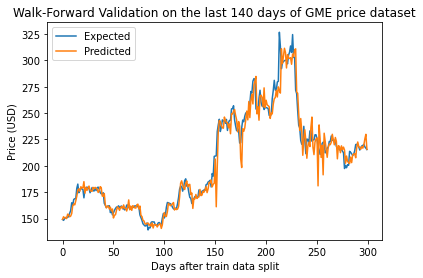

In [ ]:
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.title('Walk-Forward Validation on the last 140 days of GME price dataset')
pyplot.xlabel('Days after train data split')
pyplot.ylabel('Price (USD)')
pyplot.show()

Using this fit on new stocks

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.599055e+09,2.000000,0.0,1.0,0.0,1.00,0.000000,6.920,1.600448e+09,309.000000,0.0,21.0,0.0,0.96,0.000000,5.670
1,1.600448e+09,309.000000,0.0,21.0,0.0,0.96,0.000000,5.670,1.602083e+09,4.000000,0.0,1.0,0.0,1.00,0.477205,4.045
2,1.602083e+09,4.000000,0.0,1.0,0.0,1.00,0.477205,4.045,1.602684e+09,18.000000,0.0,1.0,0.0,0.99,0.000000,2.890
3,1.602684e+09,18.000000,0.0,1.0,0.0,0.99,0.000000,2.890,1.603210e+09,19.000000,0.0,1.0,0.0,1.00,0.145771,3.090
4,1.603210e+09,19.000000,0.0,1.0,0.0,1.00,0.145771,3.090,1.603292e+09,91.000000,0.0,1.0,0.0,1.00,0.668470,3.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1.625242e+09,3.714286,0.0,1.0,0.0,1.00,0.002469,52.010,1.625245e+09,3.846154,0.0,1.0,0.0,1.00,0.002312,51.960
748,1.625245e+09,3.846154,0.0,1.0,0.0,1.00,0.002312,51.960,1.625566e+09,0.000000,0.0,1.0,0.0,1.00,0.130465,52.520
749,1.625566e+09,0.000000,0.0,1.0,0.0,1.00,0.130465,52.520,1.625569e+09,0.428571,0.0,1.0,0.0,1.00,0.033114,52.750
750,1.625569e+09,0.428571,0.0,1.0,0.0,1.00,0.033114,52.750,1.625573e+09,0.400000,0.0,1.0,0.0,1.00,0.028110,52.620


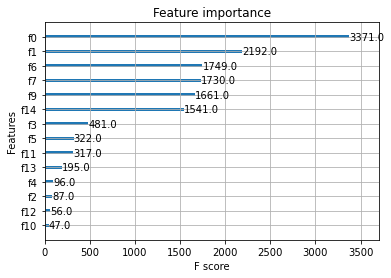

In [ ]:
import xgboost as xgb

xgb.plot_importance(model)
pd.DataFrame(data['AMC_post'])

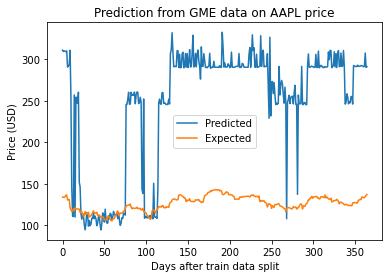

121.03689835874155


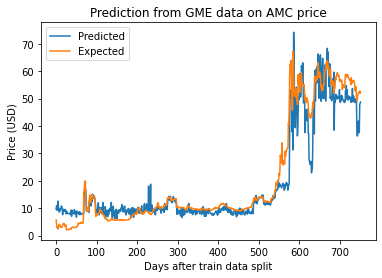

3.501188671756298


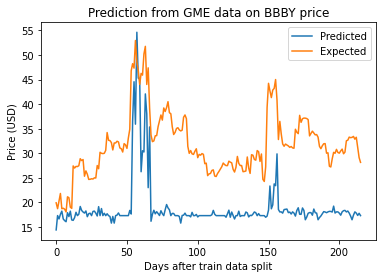

12.813964947064719


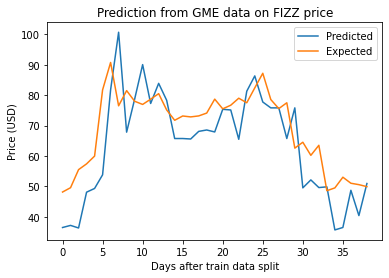

8.835363100492035


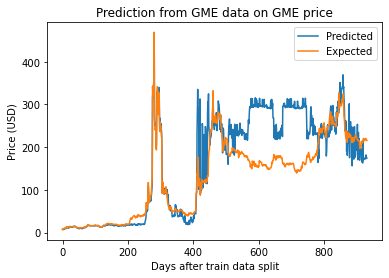

40.76176819354097


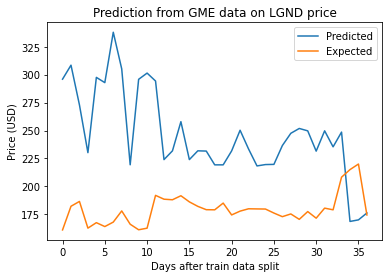

72.41395301612648


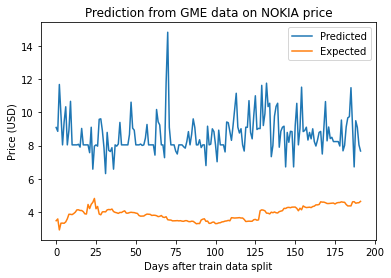

4.78982233585914


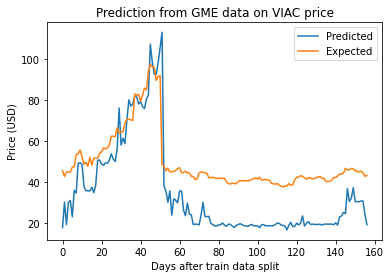

16.80255941540413


In [ ]:
### Predict on other stocks


data={}
testX = {}
testy = {}
newpredy = {}

def modelfittingandplotting(combined_df_all_stocks):
    for stock in stockname:
        data[f'{stock}_post'] = series_to_supervised(combined_df_all_stocks[f'{stock}_post'], n_in=1)
        data[f'{stock}_post'] = asarray(data[f'{stock}_post'])
        # split into input and output columns
        testX[f'{stock}_post'], testy[f'{stock}_post'] = data[f'{stock}_post'][:, :-1], pd.DataFrame(data[f'{stock}_post'][:, -1])
        newpredy[f'{stock}_post'] = pd.DataFrame(model.predict(testX[f'{stock}_post']))
        prediction_new_column_name = f'{stock}_Prediction'
        expected_new_column_name = f'{stock}_Expected'
        newpredy[f'{stock}_post'].columns = [prediction_new_column_name]      
        testy[f'{stock}_post'].columns = [expected_new_column_name] 
        pyplot.plot(newpredy[f'{stock}_post'], label='Predicted')
        pyplot.plot(testy[f'{stock}_post'], label='Expected')
        pyplot.legend()
        pyplot.title(f"Prediction from GME data on {stock} price")
        pyplot.xlabel('Days after train data split')
        pyplot.ylabel('Price (USD)')
        pyplot.show()
        print(mean_absolute_error(testy[f'{stock}_post'].dropna(), newpredy[f'{stock}_post'].dropna()))
        

modelfittingandplotting(combined_df_all_stocks)



In [ ]:
predictions = {}

for i in range(len(test)):
        #Split into X and Y 
        testX[f'{stock}_post'], testy[f'{stock}_post'] = data[f'{stock}_post'][:i, :-1], pd.DataFrame(data[f'{stock}_post'][:i, -1])
		# fit model on history and make a prediction
		yhat =model.predict(testX)
		# store forecast in list of predictions
		predictions.append(yhat[0])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))

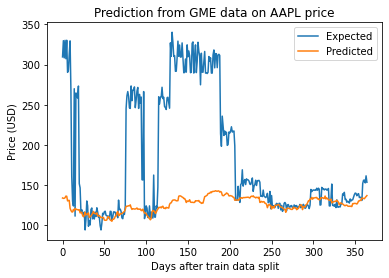

58.08953000863762


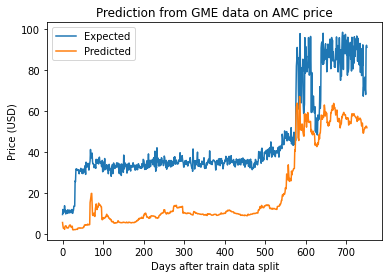

24.812366264870825


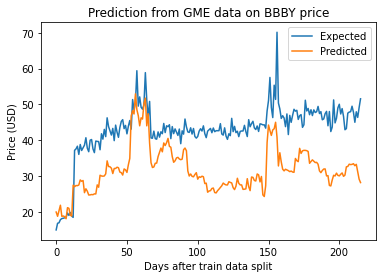

11.580669937310395


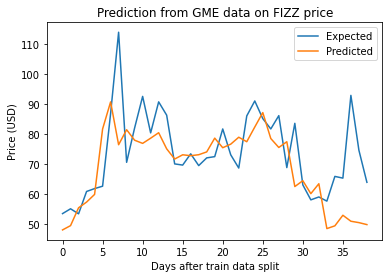

9.205825977814504


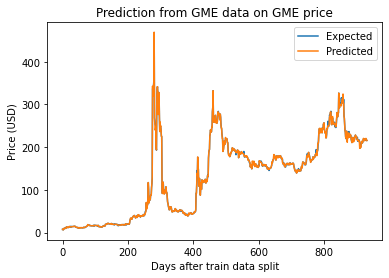

0.8401727725478684


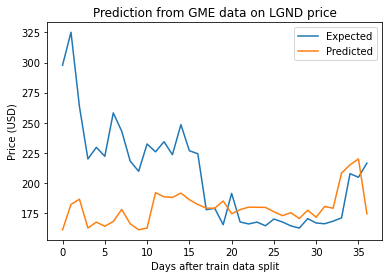

37.11914733886719


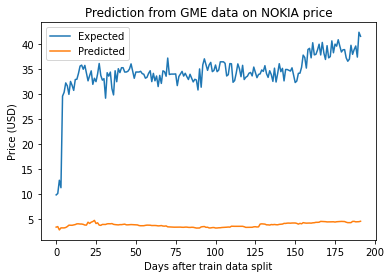

30.461947603344914


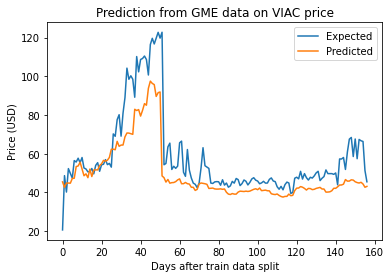

9.614161548501203


In [ ]:
### Nudge with no negative sentiment
nonegsent= {}


for stock in stockname:
    nonegsent[f'{stock}_post'] = combined_df_all_stocks[f'{stock}_post']
    nonegsent[f'{stock}_post']['title_y'] = nonegsent[f'{stock}_post']['title_y'].abs()


modelfittingandplotting(nonegsent)

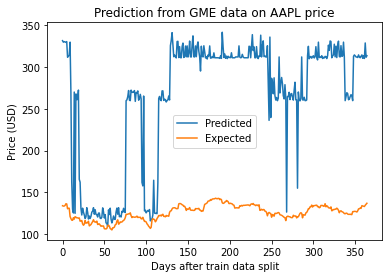

136.08351899728092


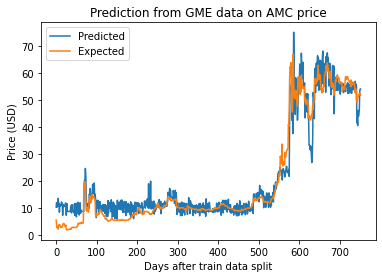

3.245052210452709


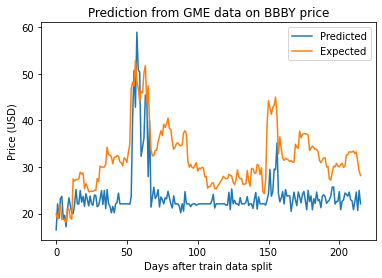

8.138166419841625


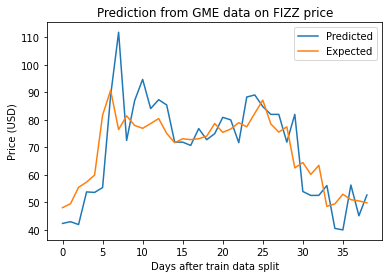

8.01963616004357


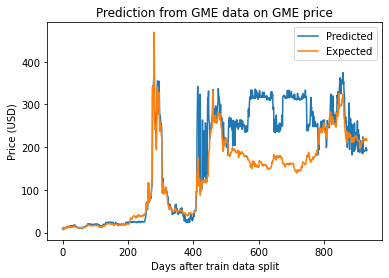

46.480674237321956


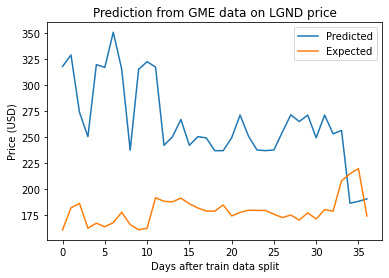

88.27798854518582


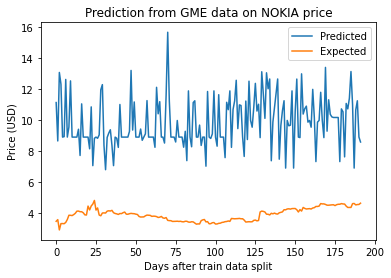

5.950219838142395


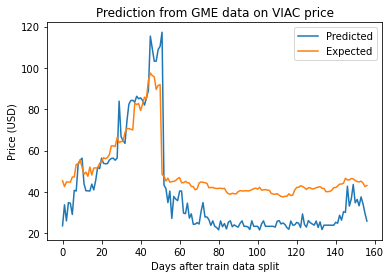

12.863508614374865


In [ ]:
### Nudge with 
scaledsent= {}


for stock in stockname:
    scaledsent[f'{stock}_post'] = combined_df_all_stocks[f'{stock}_post']
    scaledsent[f'{stock}_post']['title_y'] = scaledsent[f'{stock}_post']['title_y']*10


modelfittingandplotting(scaledsent)

In [ ]:
all(scaledsent['GME_post']['title_y']) == 0

False

,created_utc,num_comments,num_crossposts,score,total_awards_received,upvote_ratio,title_y,AMC
0,1.599055e+09,2.000000,0.0,1.0,0.0,1.00,0.000000,6.920
387,1.600448e+09,309.000000,0.0,21.0,0.0,0.96,0.000000,5.670
841,1.602083e+09,4.000000,0.0,1.0,0.0,1.00,0.690800,4.045
1008,1.602684e+09,18.000000,0.0,1.0,0.0,0.99,0.000000,2.890
1154,1.603210e+09,19.000000,0.0,1.0,0.0,1.00,0.381800,3.090
...,...,...,...,...,...,...,...,...
7275,1.625245e+09,3.846154,0.0,1.0,0.0,1.00,0.048085,51.960
7364,1.625566e+09,0.000000,0.0,1.0,0.0,1.00,0.361200,52.520
7365,1.625569e+09,0.428571,0.0,1.0,0.0,1.00,0.181971,52.750
7366,1.625573e+09,0.400000,0.0,1.0,0.0,1.00,0.167660,52.620


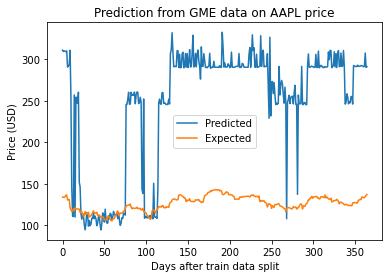

121.03689835874155


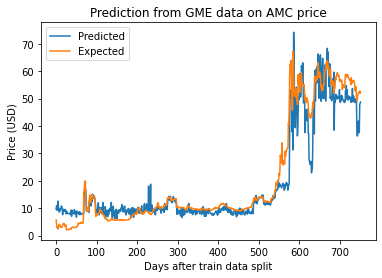

3.501188671756298


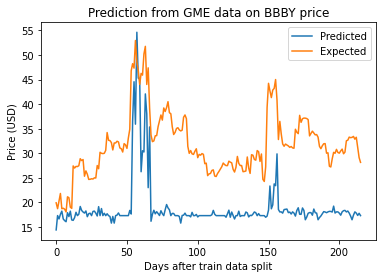

12.813964947064719


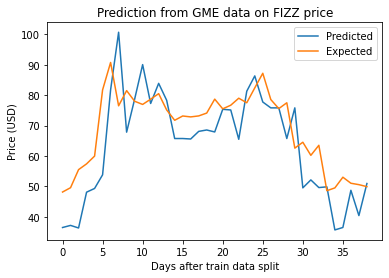

8.835363100492035


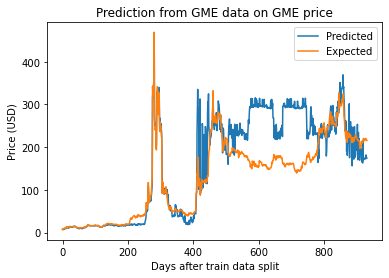

40.76176819354097


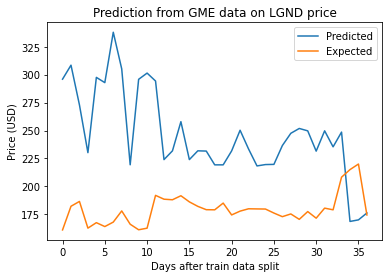

72.41395301612648


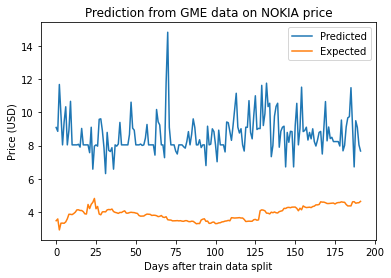

4.78982233585914


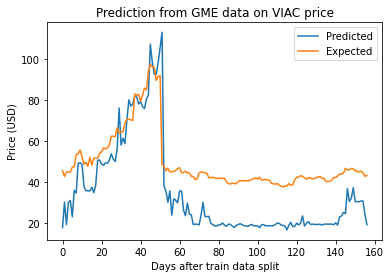

16.80255941540413


In [ ]:
nocom= {}


for stock in stockname:
    nocom[f'{stock}_post'] = combined_df_all_stocks[f'{stock}_post']
    nocom[f'{stock}_post']['created_utc'] = zerosent[f'{stock}_post']['created_utc']*0


modelfittingandplotting(zerosent)